In [48]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 55 columns):
hotel                                 119390 non-null int64
is_canceled                           119390 non-null int64
is_repeated_guest                     119390 non-null int64
reserved_room_type                    119390 non-null object
assigned_room_type                    119390 non-null object
country_is_FRA                        119390 non-null int64
country_is_DEU                        119390 non-null int64
country_is_other                      119390 non-null int64
reserved_assigned_room_type_match     119390 non-null int64
fall                                  119390 non-null int64
spring                                119390 non-null int64
summer                                119390 non-null int64
winter                                119390 non-null int64
distribution_channel_Corporate        119390 non-null int64
distribution_channel_Direct           119390 no

In [4]:
data['is_canceled'].value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

Noted that if we use majority-class method, the accuracy will be about 0.63. Therefore, the implemented method should be better than this. 

In [5]:
features = ['hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [6]:
len(features)

48

In [7]:
X = data[features]
Y = data[label]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
model.get_depth()

49

In [11]:
model.get_n_leaves()

15012

In [12]:
np.random.seed(0)
model = DecisionTreeClassifier()
score_cv = cross_val_score(model, X, Y, cv=10)

In [13]:
score_cv

array([0.70351759, 0.67035176, 0.64187605, 0.60561139, 0.56763548,
       0.63430773, 0.60353493, 0.56768303, 0.55210253, 0.60462389])

In [14]:
score_cv.mean()

0.6151244374536844

In [15]:
# to try different hyper-parameters
depths = np.arange(10,51,10)
max_features = np.arange(20,49,5)
num_leafs = [1000,5000,10000,15000]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]

np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([10, 20, 30, 40, 50]),
                          'max_features': array([20, 25, 30, 35, 40

In [16]:
DTM.best_params_

{'max_depth': 10, 'max_features': 20, 'max_leaf_nodes': 10000}

In [17]:
DTM.best_score_

0.7579026719155708

In [18]:
depths = [5,10,15]
max_features = [20]
num_leafs = [5000,7500,10000,12500,15000]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15], 'max_features': [20],
                          'max_leaf_nodes': [5000, 7500, 1000

In [19]:
DTM.best_params_

{'max_depth': 5, 'max_features': 20, 'max_leaf_nodes': 15000}

In [20]:
DTM.best_score_

0.7781640003350364

In [21]:
depths = np.arange(1,10,2)
max_features = [20]
num_leafs = [13000,14000,14500,15000,15012]


try_grid = [{'max_depth': depths, 
             'max_features': max_features,
             'max_leaf_nodes':num_leafs}]
np.random.seed(0)
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([1, 3, 5, 7, 9]),
                          'max_features': [20],
                        

In [22]:
DTM.best_params_

{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 13000}

In [23]:
DTM.best_score_

0.7865985425915069

In [31]:
model = DecisionTreeClassifier(max_depth=7,max_features=20,max_leaf_nodes=13000)

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=20, max_leaf_nodes=13000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
y_pred = model.predict(X_test)

In [49]:
print("Confusion Matrix:", "\n"+str(confusion_matrix(y_test,y_pred))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(y_test,y_pred,normalize=True, sample_weight=None))+"\n")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[13909  1025]
 [ 3706  5238]]

Accuracy Score: 
0.8018678281263087

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     14934
           1       0.84      0.59      0.69      8944

    accuracy                           0.80     23878
   macro avg       0.81      0.76      0.77     23878
weighted avg       0.81      0.80      0.79     23878



Text(0.5, 0, 'False Positive Rate')

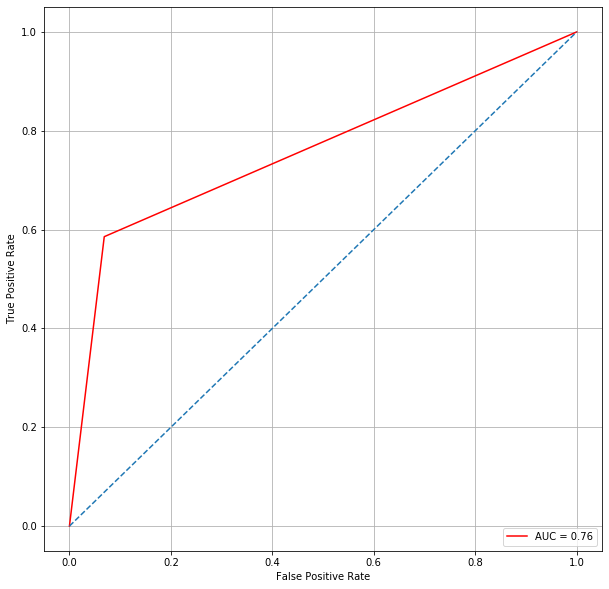

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [53]:
metrics.auc(fpr, tpr)

0.758504339187835